In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.stem import SnowballStemmer

from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob
from nltk.stem.porter import PorterStemmer  
#nltk.download('vader_lexicon')
#from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [32]:
filepath = "covid19_tweets.csv"
df = pd.read_csv(filepath)

In [33]:
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [34]:
df.shape

(179108, 13)

In [35]:
print(df.isnull().sum())

user_name               0
user_location       36771
user_description    10286
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            51334
source                 77
is_retweet              0
dtype: int64


In [36]:
duplicate_rows = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (0, 13)


### We have tweets from July 24 to August 30

<AxesSubplot:>

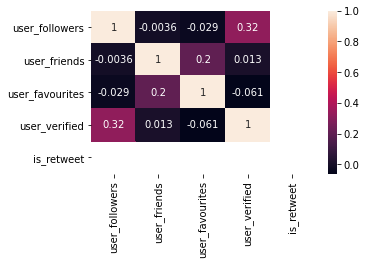

In [37]:
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot=True,linecolor='white',linewidths=0)

In [38]:
df.describe(include='all')

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
count,179108,142337,168822,179108,1.791080e+05,179108.000000,1.791080e+05,179108,179108,179108,127774,179031,179108
unique,92276,26920,89200,93708,NaN,NaN,NaN,2,136611,178683,52640,610,1
top,GlobalPandemic.NET,India,Breaking News & Critical Information to SURVIV...,2010-07-13 21:58:05,NaN,NaN,NaN,False,2020-08-06 16:00:00,"The incompetence of this administration, and t...",['COVID19'],Twitter Web App,False
freq,679,3741,679,679,NaN,NaN,NaN,156013,26,13,37792,56891,179108
mean,NaN,NaN,NaN,NaN,1.090555e+05,2121.701566,1.444411e+04,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,8.414670e+05,9162.553072,4.452270e+04,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000e+00,0.000000,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,1.720000e+02,148.000000,2.060000e+02,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,9.920000e+02,542.000000,1.791000e+03,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.284000e+03,1725.250000,9.388000e+03,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
def unique_features(data_frame):
    unique_dataframe = pd.DataFrame()
    unique_dataframe['features'] = data_frame.columns
    uniques = []
    for col in data_frame.columns:
        u = data_frame[col].nunique()
        uniques.append(u)
    unique_dataframe['uniques'] = uniques
    return unique_dataframe

<AxesSubplot:xlabel='uniques', ylabel='features'>

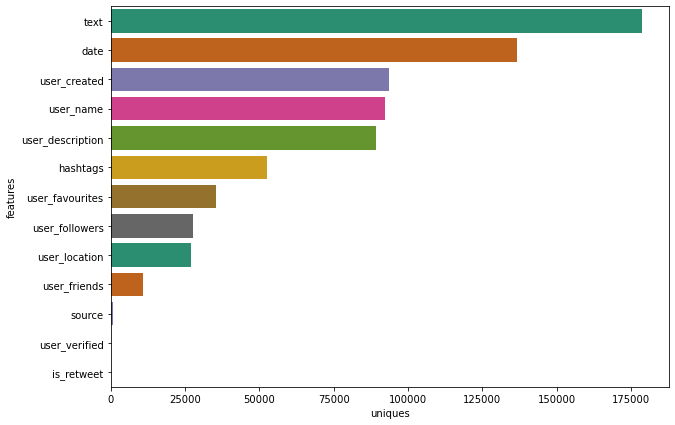

In [40]:
features = unique_features(df)
#print(features)

plt.figure(figsize=(10,7))
features = features.sort_values(by='uniques',ascending=False)
sns.barplot(x='uniques',y='features',data=features,palette='Dark2')

In [41]:
df['tweet_date']=pd.to_datetime(df['date']).dt.date
tweet_date=df['tweet_date'].value_counts().to_frame().reset_index().rename(columns={'index':'date','tweet_date':'count'})
tweet_date['date']=pd.to_datetime(tweet_date['date'])
tweet_date=tweet_date.sort_values('date',ascending=False)
tweet_date

,date,count
2,2020-08-30,8375
21,2020-08-29,4077
1,2020-08-22,11555
11,2020-08-18,7500
18,2020-08-17,7500
14,2020-08-16,7500
4,2020-08-14,7500
17,2020-08-13,7500
6,2020-08-12,7500
9,2020-08-11,7500


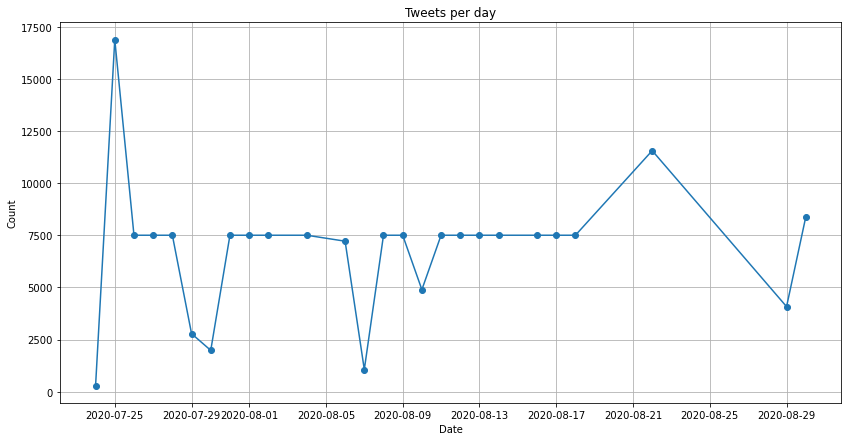

In [42]:
plt.figure(figsize=(14,7))
plt.plot(tweet_date['date'],tweet_date['count'], marker='o')
plt.title('Tweets per day')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [43]:
def remove_tag(string):
    text=re.sub('<.*?>','',string)
    return text
def remove_mention(text):
    line=re.sub(r'@\w+','',text)
    return line
def remove_hash(text):
    line=re.sub(r'#\w+','',text)
    return line

def remove_newline(string):
    text=re.sub('\n','',string)
    return text
def remove_url(string): 
    text = re.sub('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',string)
    return text
def remove_number(text):
    line=re.sub(r'[0-9]+','',text)
    return line
def remove_punct(text):
    line = re.sub(r'[!"\$%&\'()*+,\-.\/:;=#@?\[\\\]^_`{|}~]*','',text)
    #string="".join(line)
    return line
def text_strip(string):
    line=re.sub('\s{2,}', ' ', string.strip())
    return line
def remove_thi_amp_ha_words(string):
    line=re.sub(r'\bamp\b|\bthi\b|\bha\b',' ',string)
    return line

#for stemming the words 
porter = PorterStemmer()
#to remove words from other languages
#words = set(nltk.corpus.words.words())

#removing stopwords
stop_words = set(stopwords.words("english"))

#removing common words and words from other languages
new_words = ('coronavirus', 'covid', 'corona')
new_stopwords=stop_words.union(new_words)

def remove_stopwords(text):
    tweet = word_tokenize(text)
    tweet = [word for word in tweet if not word.lower() in new_stopwords]
    tweet = ' '.join(tweet)
    return tweet

def snowball_stemmer(text):
    snowball = SnowballStemmer(language='english')
    text= ' '.join([snowball.stem(word) for word in text.split()])
    return text
    

In [44]:
df['clean_tweet'] =  df['text'].str.lower()
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_tag(str(x)))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_mention(str(x)))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_hash(str(x)))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_newline(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_url(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_number(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_punct(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_thi_amp_ha_words(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:text_strip(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:remove_stopwords(x))
df['clean_tweet'] = df['clean_tweet'].apply(lambda x:snowball_stemmer(x))

df['text_length']=df['clean_tweet'].str.split().map(lambda x: len(x))

In [45]:
df=df[['tweet_date','text','clean_tweet','text_length']]
df.head(10)

,tweet_date,text,clean_tweet,text_length
0,2020-07-25,If I smelled the scent of hand sanitizers toda...,smell scent hand sanit today someon past would...,11
1,2020-07-25,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,hey wouldnt made sens player pay respect a…,8
2,2020-07-25,@diane3443 @wdunlap @realDonaldTrump Trump nev...,trump never claim hoax claim effort to…,7
3,2020-07-25,@brookbanktv The one gift #COVID19 has give me...,one gift give appreci simpl thing alway around...,9
4,2020-07-25,25 July : Media Bulletin on Novel #CoronaVirus...,juli media bulletin novel …,5
5,2020-07-25,#coronavirus #covid19 deaths continue to rise....,death continu rise almost bad ever politician ...,9
6,2020-07-25,How #COVID19 Will Change Work in General (and ...,chang work general recruit specif via …,7
7,2020-07-25,You now have to wear face coverings when out s...,wear face cover shop includ visit local commun...,9
8,2020-07-25,Praying for good health and recovery of @Chouh...,pray good health recoveri,4
9,2020-07-25,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,pope god prophet sadhu sundar selvaraj watch …,8


In [46]:
df.shape

(179108, 4)

In [47]:
df['text_length'].value_counts()

10    25460
9     24523
11    21439
8     20141
7     16076
12    14941
6     12844
5      9567
13     7972
4      7685
3      5833
2      4098
14     3500
1      2694
15     1414
16      480
0       163
17      163
18       60
19       25
20       12
34        8
22        6
21        3
23        1
Name: text_length, dtype: int64

<AxesSubplot:xlabel='text_length', ylabel='count'>

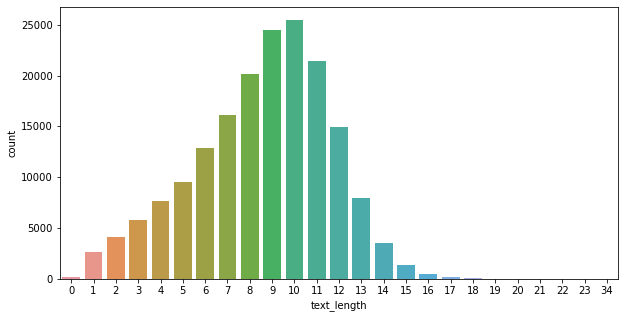

In [48]:
plt.figure(figsize=(10,5))
sns.countplot(x='text_length',data=df)

In [49]:
df=df[(df['text_length'] >= 6) & (df['text_length'] <= 13) ]
df.shape

(143396, 4)

<AxesSubplot:xlabel='text_length', ylabel='count'>

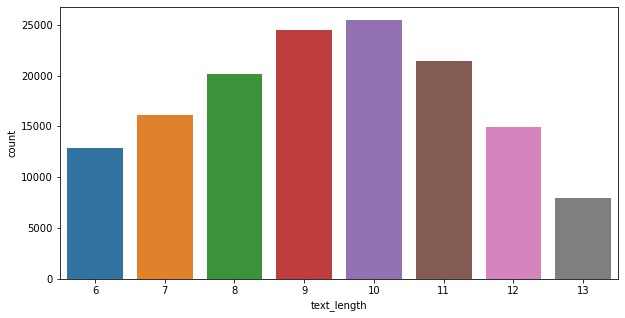

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='text_length',data=df)

In [56]:
df.to_csv(r'cleaneddata.csv',header=False,index=False) 

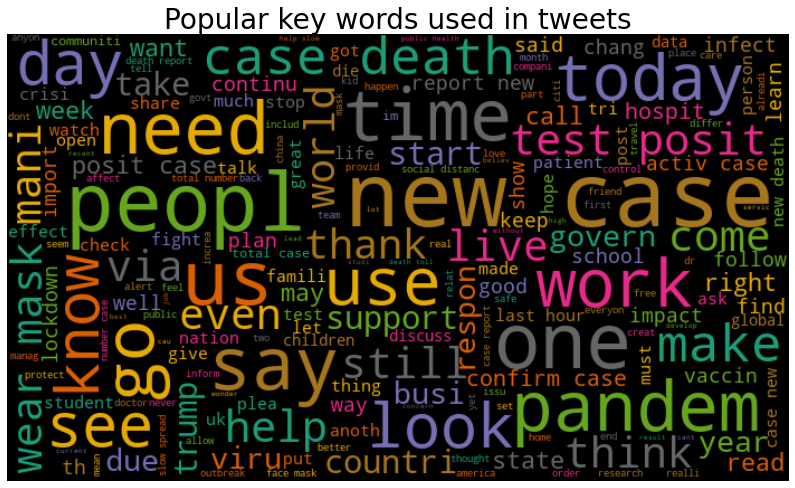

In [51]:
#stop=set(stopwords.words('english'))

textall = ' '.join(text for text in df['clean_tweet'])

wordcloud = WordCloud(width=700, height=400, max_font_size=80, colormap='Dark2').generate(textall)
plt.figure(figsize=(14, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title('Popular key words used in tweets', fontsize = 28)
plt.axis('off')
plt.show()

In [52]:
from  collections import Counter

def words(text):
    text= re.findall(r'\w+',text)
    return text

words=[]
word= df['clean_tweet'].apply(lambda x:words(x))
words.append(word)
print(words[1])
# c= Counter(words)
# c.most_common(10)

TypeError: 'list' object is not callable

In [29]:
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2)
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(df['clean_tweet'])
tfidf_word_feature[5]

<1x26984 sparse matrix of type '<class 'numpy.float64'>'
	with 6 stored elements in Compressed Sparse Row format>

In [53]:
# Using NITK Sentiment Analyser (SIA)
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# Using textblob
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [54]:
#Fetch SIA sentiments
sentiments_using_SIA = df.clean_tweet.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,clean_tweet
pos,105940
neg,37456


In [55]:
#Fetch Textblob sentiments
sentiments_using_textblob = df.clean_tweet.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,clean_tweet
pos,123061
neg,20335


In [33]:
# we will use SIA as it has identified more negative tweets
# adding the sentiment to a new column 
df['sentiment_sia'] = sentiments_using_SIA
df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_date,clean_tweet,text_length,sentiment_sia
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,2020-07-25,smell scent hand sanit today someon past would...,11,pos
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,2020-07-25,hey wouldnt made sens player pay respect a…,8,pos
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,2020-07-25,trump never claim hoax claim effort to…,7,pos
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,2020-07-25,one gift give appreci simpl thing alway around...,9,pos
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,death continu rise almost bad ever politician ...,9,negative


In [34]:
from sklearn.preprocessing import LabelEncoder


enc = LabelEncoder()
encoded_sentiment = enc.fit_transform(df['sentiment_sia'])
df['sentiment']= encoded_sentiment


df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,tweet_date,clean_tweet,text_length,sentiment_sia,sentiment
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False,2020-07-25,smell scent hand sanit today someon past would...,11,pos,1
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False,2020-07-25,hey wouldnt made sens player pay respect a…,8,pos,1
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False,2020-07-25,trump never claim hoax claim effort to…,7,pos,1
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False,2020-07-25,one gift give appreci simpl thing alway around...,9,pos,1
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False,2020-07-25,death continu rise almost bad ever politician ...,9,negative,0


In [35]:
def ngram_df(corpus,nrange,n=None):
    vec = CountVectorizer(stop_words = 'english',ngram_range=nrange).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    total_list=words_freq[:n]
    df=pd.DataFrame(total_list,columns=['text','count'])
    return df
unigram_df=ngram_df(df['clean_tweet'],(1,1),20)
bigram_df=ngram_df(df['clean_tweet'],(2,2),20)
trigram_df=ngram_df(df['clean_tweet'],(3,3),20)

In [36]:
#unigram_df

<AxesSubplot:xlabel='count', ylabel='text'>

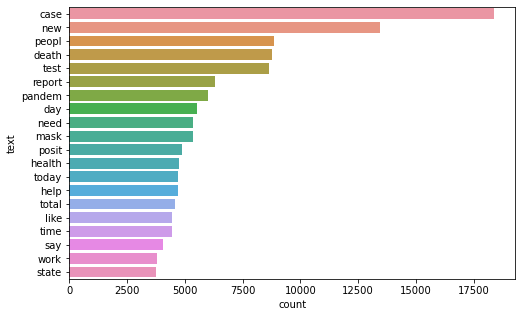

In [37]:
plt.figure(figsize=(8,5))
sns.barplot(x='count',y='text',data=unigram_df)

<AxesSubplot:xlabel='count', ylabel='text'>

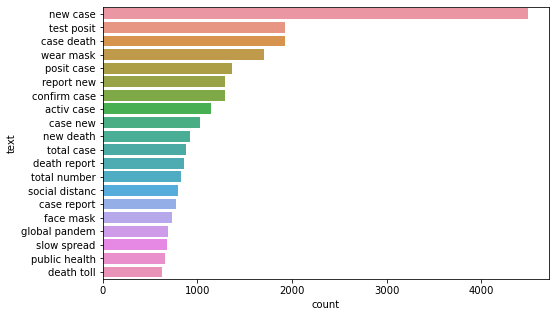

In [38]:
plt.figure(figsize=(8,5))
sns.barplot(x='count',y='text',data=bigram_df)

<AxesSubplot:xlabel='count', ylabel='text'>

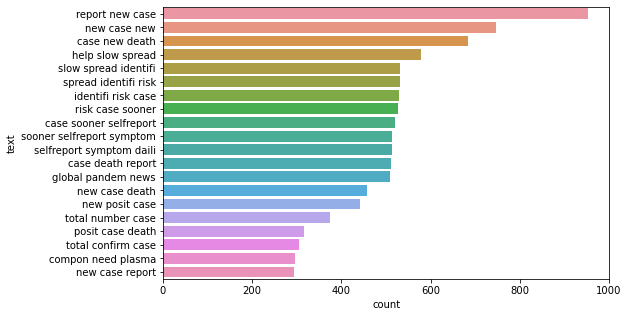

In [39]:
plt.figure(figsize=(8,5))
sns.barplot(x='count',y='text',data=trigram_df)